# CoLA&EDM

In [23]:
#import modules
import re
import time
import datetime
import collections
import pandas as pd
import warnings

### 전처리해주기

* 카카오톡 파일이 경로에 있어야 아래 함수가 잘 실행됨

In [66]:
def KaKao_preprocessing():
    f = open('KakaoTalk_20220105_0901_55_196_group.txt', 'r', encoding='utf-8')
    f.readline()
    f.readline()
    f.readline()

    df = pd.DataFrame()
    tname = ''
    tstatus=''
    tdate = ''
    ttimestamp=''
    ttext=''
    tline=''

    while True:
            line = f.readline()
            if not line: break
            if line[:4] == '----':
                # df에 전 행을 추가한다. 
                ttimestamp_total = tdate + ' ' + ttimestamp
                df = df.append(pd.Series([tname, tstatus, ttimestamp_total, ttext]), ignore_index=True)
                
                # 초기화
                tname = ''
                tstatus=''
                tdate = ''
                ttimestamp=''
                ttext=''
                tline=''        
                # 날짜가 바뀜
                tdate = line.split()
                tdate = tdate[1]+tdate[2]+tdate[3]
            elif line[0] == '[':
                ttimestamp_total = tdate + ttimestamp
                if tname != '':
                    # df에 전 행을 추가한다. 
                    df = df.append(pd.Series([tname, tstatus, ttimestamp_total, ttext]), ignore_index=True)
                
                # 초기화
                tname = ''
                tstatus=''
                ttimestamp=''
                ttext=''
                tline=''        
                try:
                    line = line.split('[')
                    line = line[1:]
                    line = [i.split(']') for i in line]
                    name = line[0][0].split('(')
                    try:
                        tname = name[0]
                        tstatus = name[1][:-1]
                    except:
                        tname = name[0]
                        tstatus = '스터디장'
                    ttimestamp = line[1][0]
                    ttext = line[1][1]
                except:
                    continue
            else:
                ttext += line
            ttext = re.sub(r'\n', ". ", ttext)

    df = df.rename(columns={0:'Name', 1:'Status', 2:'TimeStamp', 3:'Text'})            
    df.dropna()
    df.to_excel('CoLA&EDM_2021_kakaotalk2.xlsx')
    return df

In [69]:
df = KaKao_preprocessing()

### 카카오톡 데이터로 SNA 해보기

In [68]:
%pip install networkx

Note: you may need to restart the kernel to use updated packages.


C:\Users\enkee\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\enkee\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\enkee\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\enkee\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\enkee\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools

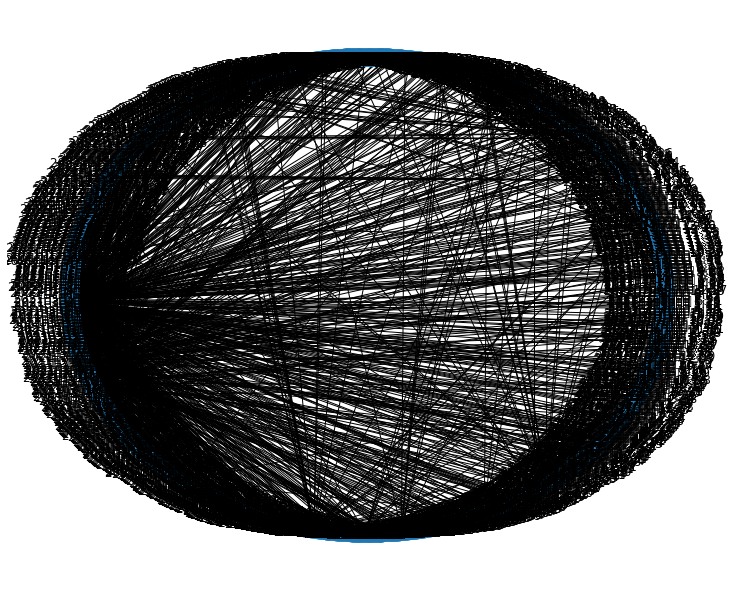

In [72]:
import networkx as nx
from matplotlib.pyplot import figure

G = nx.Graph()
G = nx.from_pandas_edgelist(df, 'Name', 'TimeStamp')
figure(figsize=(10,8))
nx.draw_shell(G, with_labels=True)
